In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import math
from matplotlib import animation
%matplotlib notebook

# DELTA DIRAC FUNCTION
def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val

dir0 = 0.0  
dir1 = 0.0  

def I(x,sig): # initial u(x,0)
    M = np.size(x)
    i_x = ddf(x,sig)
    k = np.zeros_like(x)
    return i_x

# def U_exact(x,t,sig,v,D):
#     M = np.size(x)
#     u_ex = np.zeros(M)
#     if t == 0:
#         u_ex = ddf(x,sig)
#     else:
#         y = x - v*t
#         u_ex = np.exp(-y**2/(4*t*D))/np.sqrt(4*np.pi*t*D)
#         u_ex[0] = dir0
#         u_ex[M-1] = dir1
#     return u_ex

def U_exact(x,t,sig,v,D):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = ddf(x,sig)
    else:
        u_ex = norm.pdf(x,v*t,np.sqrt(2*D*t))
    return u_ex

def U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D):
    '''
    FINDING NUMERICAL 
    '''

    Nt_points = Nt_gaps + 1
    h = T/(Nt_points)  # time step

    t = np.linspace(0.,T,Nt_points)  # times at each time step
    Nx_points = Nx_spaces + 1 
    x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
    dx = x_pde[1] - x_pde[0] 
    dt = t[1] - t[0]

    # Setting B, C and v for the numerical soultions
    C = D*dt/(dx**2)
    B = -v*dt/(dx)
    U = np.zeros((Nx_points,Nt_points))
    
    U[:,0]=I(x_pde,sig)
    # enforcing the boundary condition
    U[0,:]  = dir0 
    U[-1,:] = dir1

    u_old = I(x_pde,sig)

    u = np.zeros(Nx_points)
    # and to store the full solution
    U = np.zeros((Nx_points,Nt_points))
    U[:,0] = u_old
    for n in range(1, Nt_points):  
        # set Dirichlet boundary points here
        #...
        # compute u at inner mesh points
        for i in range(1, Nx_points-1):
            if v > 0:
                u[i] = (1-2*C+B)*u_old[i] + (C-B)*(u_old[i-1]) + (C)*(u_old[i+1])
            elif v < 0: 
                u[i] = (1-2*C-B)*u_old[i] + C*(u_old[i-1]) + (C+B)*(u_old[i+1])
            else:
                u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])

        # update u_old before next step
        u_old[:]= u

        # copy into full storage
        U[:,n] = u;
    
    return U

def plotting(U,L,sig,T,Nt_gaps,Nx_spaces, v,D):
    size_t = np.size(U,1)-1 # number of time steps
    t = np.linspace(0.,T,Nt_gaps-1)
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    markers =['X','.','+','o']
    colours = ['r','c','b','orange','m'] # make comparison easy
    colour_pos = 0;
    x_pde = np.linspace(-L, L, Nx_spaces+1)
    N_dots = 20
    x_dots = np.linspace(-L, L, N_dots+1)    # spacial points to plot exact solution at

# some arbitarily chosen time points to compare at
    for plot_pos in [0, round(size_t/10), round(size_t/5), round(size_t/2), round(size_t-2)]:
    # exact solution
        U_tplot = U_exact(x_pde,t[plot_pos],sig,v,D) 
        label = "t=" + "%0.3f" % (round(t[plot_pos]),)
        ax[0].plot(x_pde,U_tplot,color = colours[colour_pos],ls='--', label=label)

    # numerical solution
        label = "t=" + "%0.3f" % (round(t[plot_pos]),)
        ax[1].plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    

    plt.xlim(-L,L) # zoom in on area of interest
    ax[0].legend(loc='upper left',fontsize = 7)
    ax[0].set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'Exact solution')
    ax[1].legend(loc='upper left',fontsize = 7)
    ax[1].set(xlabel = 'Space (km)', ylabel = 'Concentration (Kg/km^3)', title = 'Numerical solution')
    plt.show()

<IPython.core.display.Javascript object>


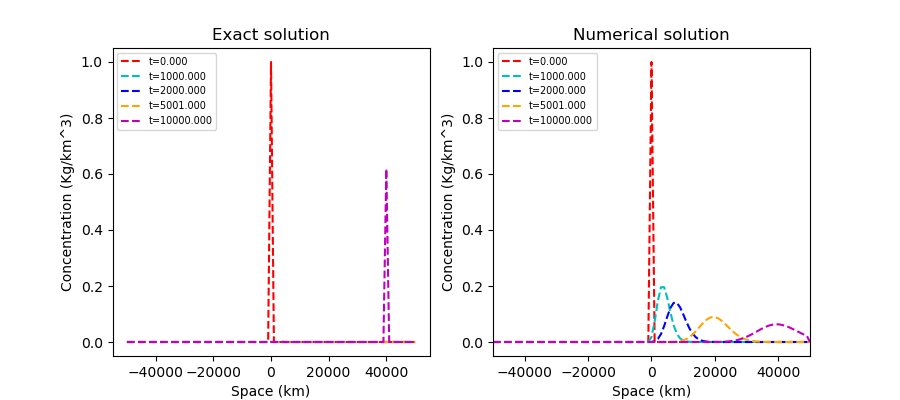

In [3]:
Nt_gaps,T,Nx_spaces,L,v,I,sig,D = 10000, 10000, 100, 50000, 4, I, 1,2.08e-5
#T = 10000s, L = 40km,, v=10m/s, D= 0.208cm^2/s 
U_actual = U_sol(Nt_gaps,T,Nx_spaces,L,v,I,sig,D)
plotting(U_actual,L,sig,T,Nt_gaps,Nx_spaces,v,D)